In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
df=pd.read_csv('WineQT.csv')
df.sample(7)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
336,9.3,0.27,0.41,2.00,0.091,6.0,16.0,0.99800,3.28,0.70,9.7,5,476
241,10.9,0.39,0.47,1.80,0.118,6.0,14.0,0.99820,3.30,0.75,9.8,6,342
232,11.6,0.53,0.66,3.65,0.121,6.0,14.0,0.99780,3.05,0.74,11.5,7,326
141,11.5,0.30,0.60,2.00,0.067,12.0,27.0,0.99810,3.11,0.97,10.1,6,197
534,7.3,0.51,0.18,2.10,0.070,12.0,28.0,0.99768,3.52,0.73,9.5,6,749
500,7.5,0.38,0.48,2.60,0.073,22.0,84.0,0.99720,3.32,0.70,9.6,4,703
889,6.8,0.64,0.00,2.70,0.123,15.0,33.0,0.99538,3.44,0.63,11.3,6,1258


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

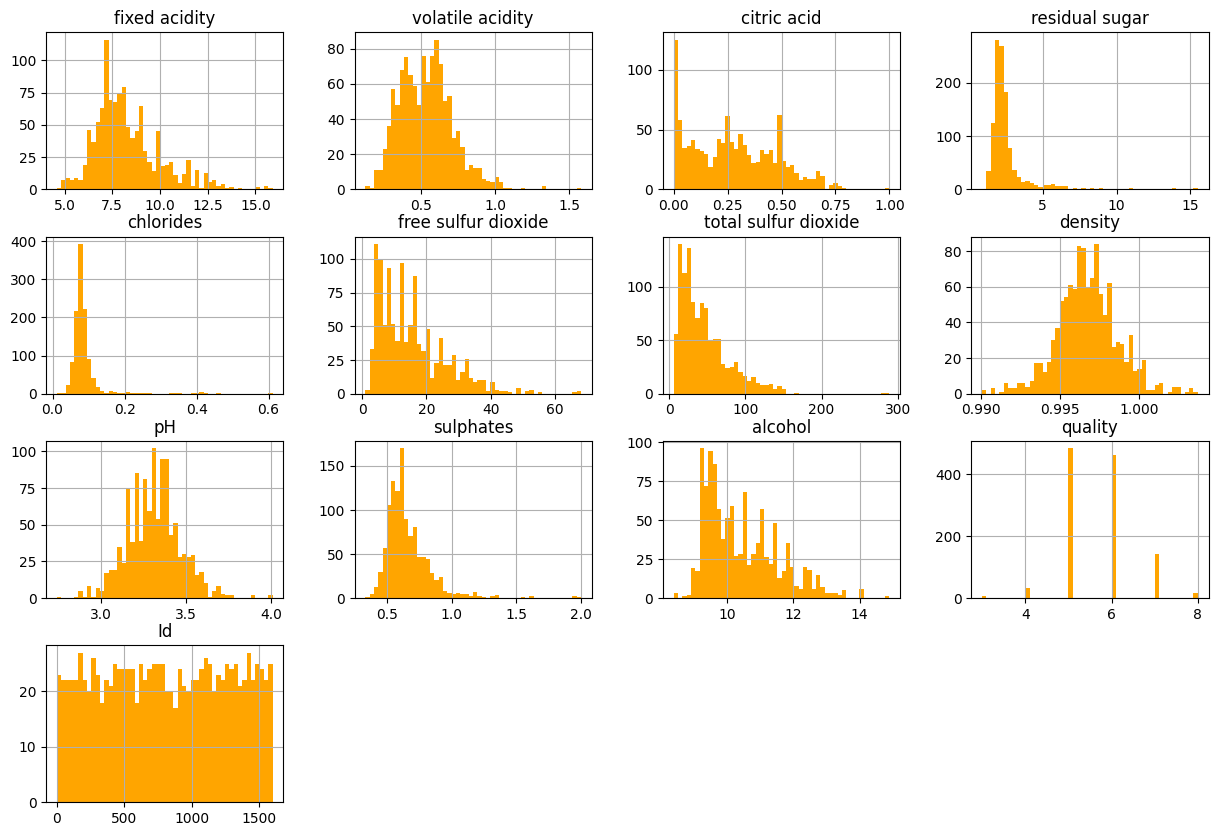

In [16]:

df.hist(bins=50,color="orange",figsize=(15,10))

plt.show()



In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X=df.drop(columns=['Id','quality'])

In [21]:
X.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [22]:
y=df[['quality']]

In [24]:
y.columns

Index(['quality'], dtype='object')

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=21)


In [26]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(914, 11)
(229, 11)
(914, 1)
(229, 1)


In [31]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import numpy as np

In [32]:
def evil_metrics(actual,pred):
    rmse=np.sqrt(mean_squared_error(actual,pred))
    mae=mean_absolute_error(actual,pred)
    r2=r2_score(actual,pred)

    return rmse,mae,r2

In [28]:
lr=ElasticNet(alpha=0.1,l1_ratio=0.5,random_state=42)

In [29]:
lr.fit(X_train,y_train)

ElasticNet(alpha=0.1, random_state=42)

In [30]:
pred=lr.predict(X_test)

In [33]:
rmse,mae,r2=evil_metrics(y_test,pred)

In [34]:
print(rmse)
print(mae)
print(r2)

0.7386892618595011
0.5827652484378922
0.18433807093143295
